In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os

import seaborn as sns

#from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/DELL/Downloads/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Shopping Customer Segmentation using K-Means Clustering

Objective: Understanding Target Customers for the marketing team to plan a Stratergy

Identify and Cluster marketing groups based on Age, Income and Shopping mall Score and Label them

Divide your mall target into approachable groups

Look for insights into highest spending customers as well as targeted marketing Approaches 

In [4]:
data.shape

(200, 5)

In [5]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [9]:
data.Gender.value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

In [10]:
age_tab = pd.crosstab(index = data['Age'], columns ='Count')

In [11]:
age_tab

col_0,Count
Age,
18,4
19,8
20,5
21,5
22,3
23,6
24,4
25,3
26,2


In [12]:
data.rename({'Annual Income (k$)':'AnnualIncome',
            'Spending Score (1-100)':'SpendingScore'}, axis=1, inplace=True)

In [13]:
data.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [14]:
data.drop(['CustomerID'], axis = 1, inplace = True)

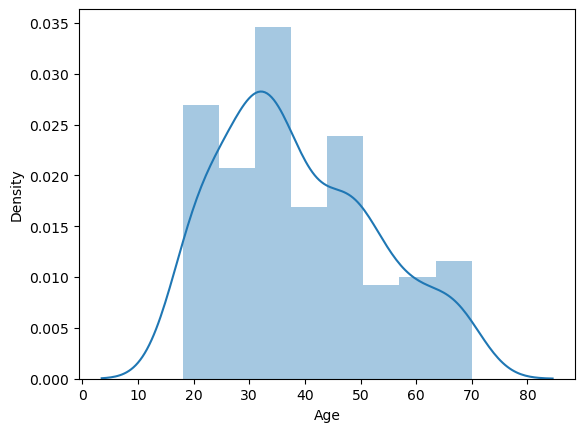

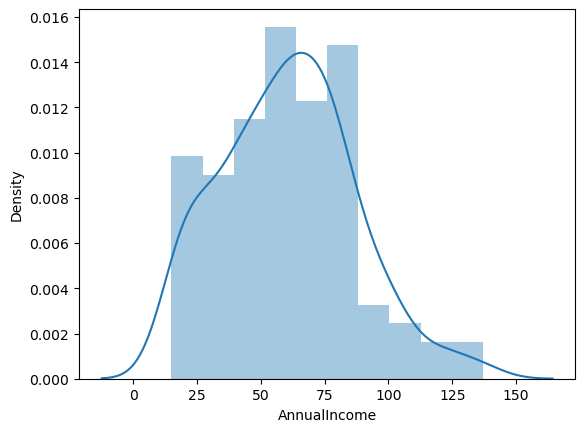

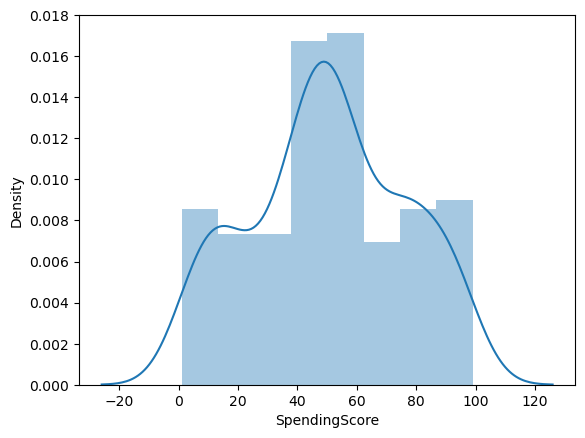

In [15]:
columns = ['Age', 'AnnualIncome', 'SpendingScore']
for i in columns:
    plt.figure()
    sns.distplot(data[i])

In [16]:
#sns.kdeplot(data['AnnualIncome'],shade=True,Hue=data['Gender'])

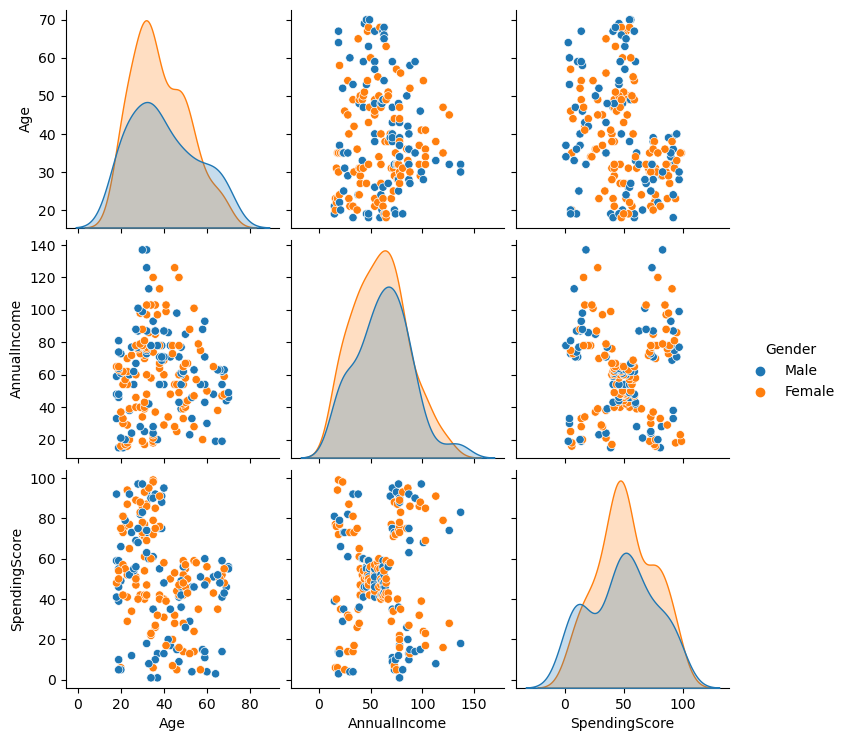

In [17]:
sns.pairplot(data,hue='Gender')

In [18]:
#data.groupby(['Gender'])['Age', 'AnnualIncome', 'SpendingScore'].mean()

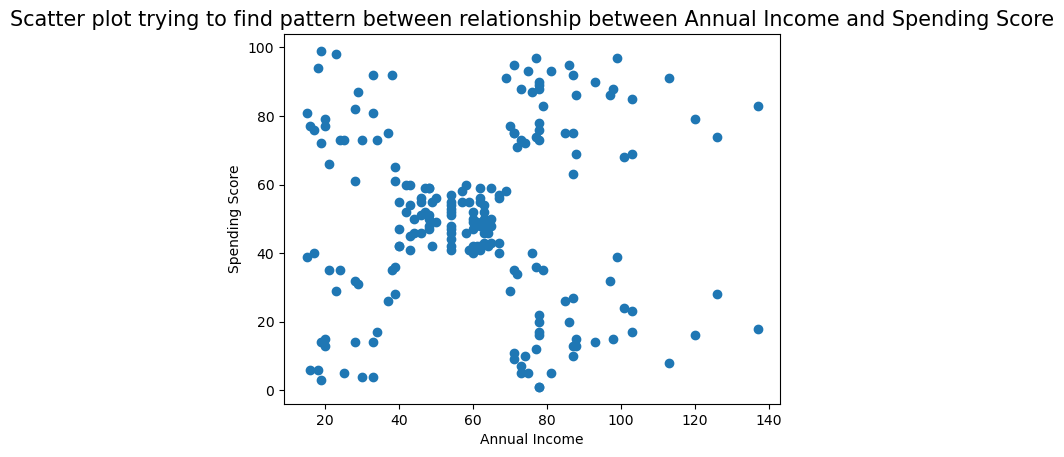

In [19]:
plt.scatter(data['AnnualIncome'], data['SpendingScore'])
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Scatter plot trying to find pattern between relationship between Annual Income and Spending Score', fontsize=15)
plt.show()
#from scatter plto below we can identify 5 clusters with the clusteer to the
#up and left showing the customers with the high spending score and also high annual salary

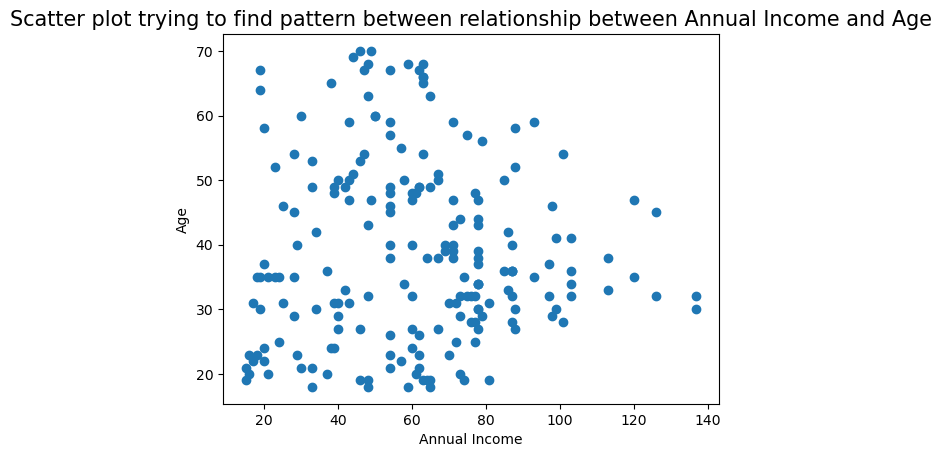

In [20]:
plt.scatter(data['AnnualIncome'], data['Age'])
plt.xlabel('Annual Income')
plt.ylabel('Age')
plt.title('Scatter plot trying to find pattern between relationship between Annual Income and Age', fontsize=15)
plt.show()
# it can be inferred from the data above that customers from age 40 to 60 are the highest earners as seen in the scatter plot

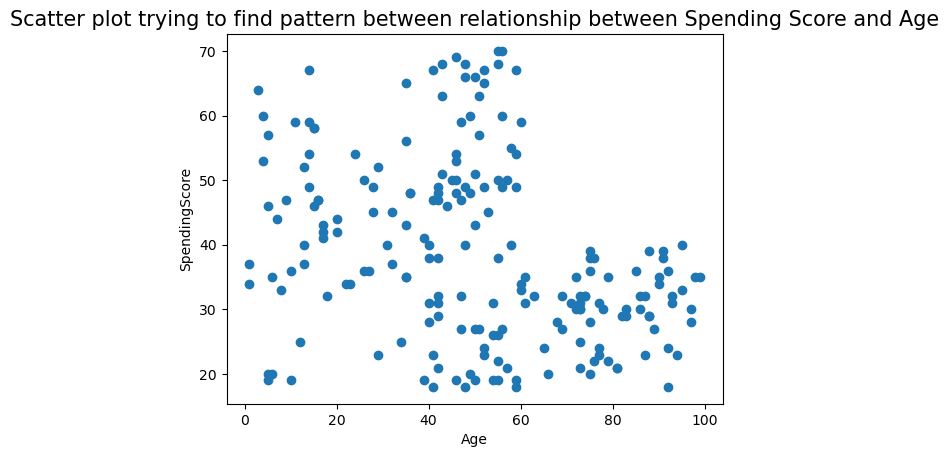

In [21]:
plt.scatter(data['SpendingScore'], data['Age'])
plt.xlabel('Age')
plt.ylabel('SpendingScore')
plt.title('Scatter plot trying to find pattern between relationship between Spending Score and Age', fontsize=15)
plt.show()
# it can be inferred from the data above that majority of the customers with high spending score are the customers from age 40 to 60 as they are also the set with the highest earners

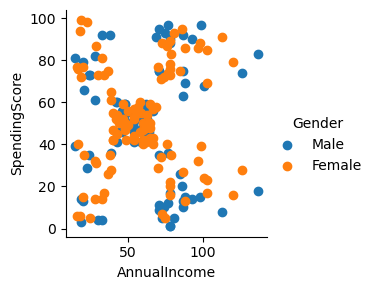

In [22]:
sns.FacetGrid(data, hue = 'Gender', ).map(plt.scatter, "AnnualIncome", "SpendingScore").add_legend()

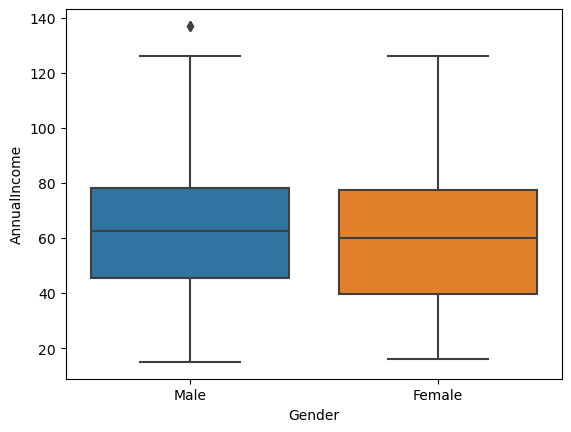

In [23]:
sns.boxplot(x='Gender', y='AnnualIncome', data=data)
plt.show()

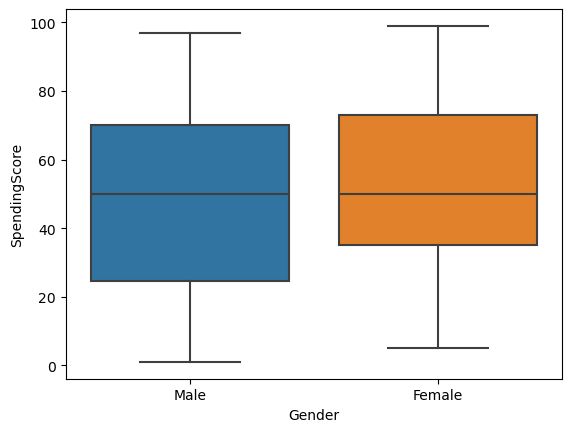

In [24]:
sns.boxplot(x='Gender', y='SpendingScore', data=data)
plt.show()

In [25]:
#sns.distplot(data = data, x = ['AnnualIncome'])

K MEANS CLUSTERING

In [26]:
data

,Gender,Age,AnnualIncome,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
new_data = data.copy()

In [29]:
LablE = LabelEncoder()

In [30]:
new_data.dtypes

Gender           object
Age               int64
AnnualIncome      int64
SpendingScore     int64
dtype: object

In [31]:
new_data['Gender']  = LablE.fit_transform(data['Gender'])

In [32]:
new_data

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [33]:
data= new_data

In [34]:
data

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [35]:
#Bivariate Clustering: which is the comparison and clustering of two varibles to get useful insights into data
clustering1 = KMeans()
#Ideally from graph above we should be able to detect that the number of clusters for the bivariables will be 4 clusters showing 5 cluster points as clustering starts from 0

In [36]:
clustering1.fit(data[['AnnualIncome', 'SpendingScore']])

KMeans()

In [37]:
clustering1.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 6, 3, 6, 6,
       4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 0, 6, 6, 0, 6, 0, 6, 6, 0, 0, 6, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7, 5, 7,
       5, 7])

In [38]:
data['AI and SS Cluster'] = clustering1.labels_
data.head()

,Gender,Age,AnnualIncome,SpendingScore,AI and SS Cluster
0,1,19,15,39,4
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4


In [39]:
data['AI and SS Cluster'].value_counts()

AI and SS Cluster
0    48
6    38
1    29
2    23
4    21
3    21
5    10
7    10
Name: count, dtype: int64

In [40]:
clustering1.inertia_
#what inertia represents is the distance between the centroid so we want to make sure it is a relatively low number although it's still not the decididng factor for number of clusters

25011.920255473768

In [41]:
inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data[['AnnualIncome', 'SpendingScore']])
    inertia_scores.append(kmeans.inertia_)

In [42]:
inertia_scores

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30241.343617936585,
 25028.020475269415,
 21838.863692828912,
 19657.783608703958]

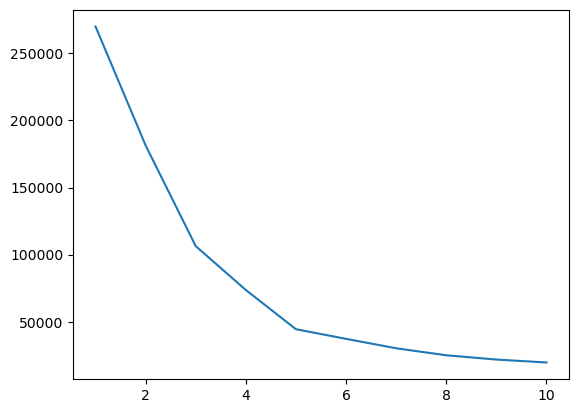

In [43]:
plt.plot(range(1,11), inertia_scores)
#from elbow plot below the best cluster number to use is 5 so append all code using the cluster number of 5

KMeans(n_clusters=5)

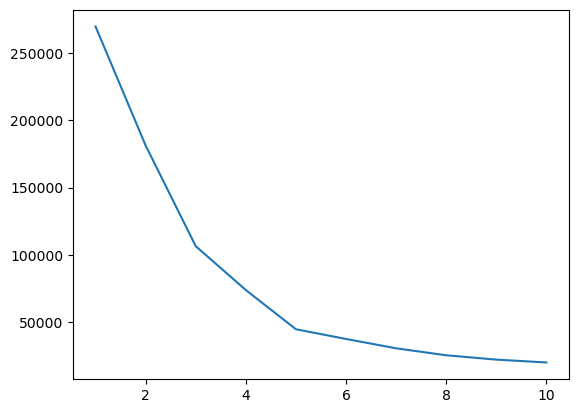

In [48]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(data[['AnnualIncome', 'SpendingScore', 'Gender', 'Age']])
clustering2.labels_

data['New AI and SS Cluster'] = clustering2.labels_
data.head()

inertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(data[['AnnualIncome', 'SpendingScore']])
    inertia_scores.append(kmeans.inertia_)
inertia_scores
plt.plot(range(1,11), inertia_scores)


clustering2.fit(data[['AnnualIncome', 'SpendingScore']])

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

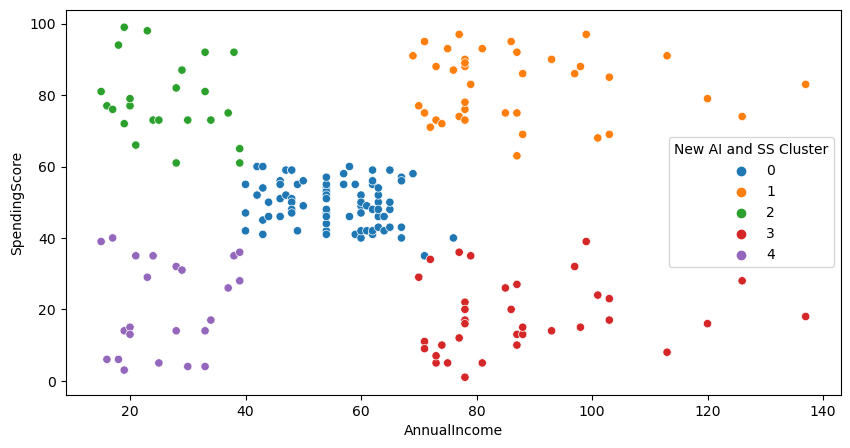

In [49]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=data, x = 'AnnualIncome', y = 'SpendingScore', hue = 'New AI and SS Cluster', palette = 'tab10')

In [50]:
 #Adding Centroid
clustering2.cluster_centers_

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

In [51]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x', 'y']

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

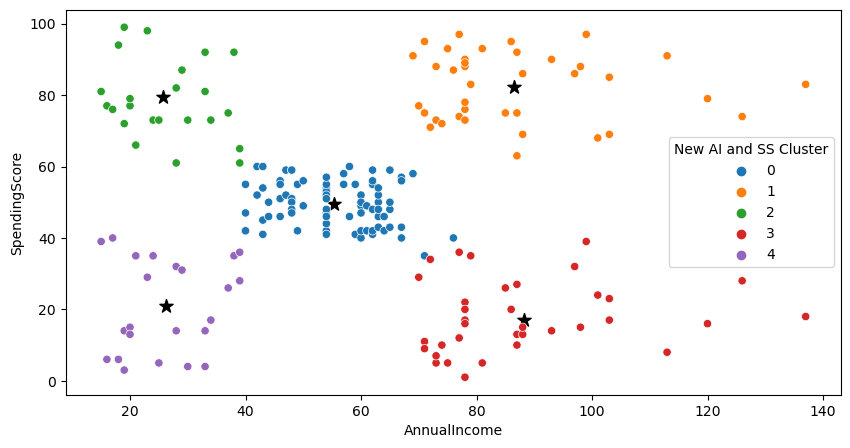

In [52]:
plt.figure(figsize=(10,5))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x = 'AnnualIncome', y = 'SpendingScore', hue = 'New AI and SS Cluster', palette = 'tab10')

In [53]:
pd.crosstab(data['New AI and SS Cluster'], data['Gender'],normalize='index')
#normalize to show distribution in percentage

Gender,0,1
New AI and SS Cluster,,
0,0.582278,0.417722
1,0.538462,0.461538
2,0.608696,0.391304
3,0.472222,0.527778
4,0.608696,0.391304


In [54]:
#data.groupby('New AI and SS Cluster') ['Age', 'AnnualIncome','SpendingScore'].mean()


MULTIVARIATE CLUSTER


In [55]:
from sklearn.preprocessing import StandardScaler
#Scalimg the Data

In [56]:
scale=StandardScaler()

In [57]:
data.head()

,Gender,Age,AnnualIncome,SpendingScore,AI and SS Cluster,New AI and SS Cluster
0,1,19,15,39,4,4
1,1,21,15,81,3,2
2,0,20,16,6,4,4
3,0,23,16,77,3,2
4,0,31,17,40,4,4


In [58]:
data1 =pd.get_dummies(data)
data1.head()

,Gender,Age,AnnualIncome,SpendingScore,AI and SS Cluster,New AI and SS Cluster
0,1,19,15,39,4,4
1,1,21,15,81,3,2
2,0,20,16,6,4,4
3,0,23,16,77,3,2
4,0,31,17,40,4,4


In [59]:
data1=pd.get_dummies(data,drop_first=True)

In [61]:
data1 = data1[['Age','AnnualIncome', 'SpendingScore', 'Gender']]

In [62]:
data1.head()

,Age,AnnualIncome,SpendingScore,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


In [63]:
data1 = scale.fit_transform(data1)

In [64]:
data1= pd.DataFrame(scale.fit_transform(data1))
data1.head()

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405


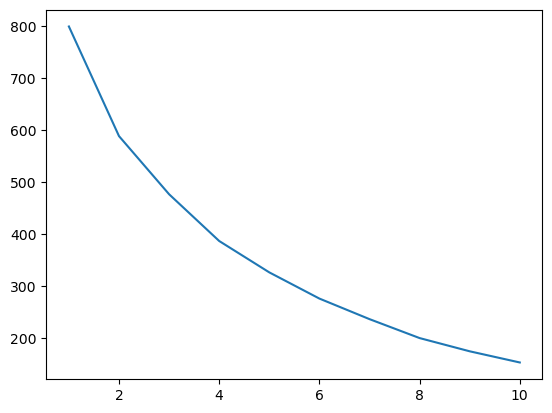

In [65]:
inertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(data1)
    inertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11), inertia_scores2)

<Axes: xlabel='AnnualIncome', ylabel='SpendingScore'>

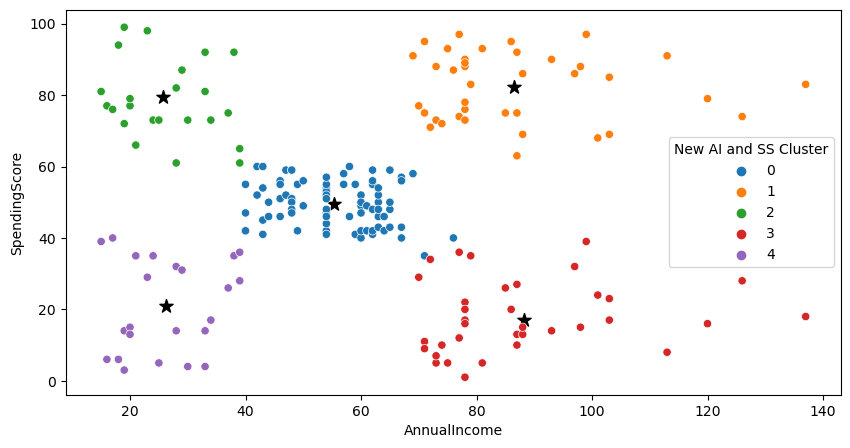

In [66]:
plt.figure(figsize=(10,5))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=data, x = 'AnnualIncome', y = 'SpendingScore', hue = 'New AI and SS Cluster', palette = 'tab10')

Analysis: Target group would be cluster 2 which has a high spending score and high income

54 percent of shoppers in cluster 2 are women, we should look for ways to attract these customers using market campaign targeting popular female items in this cluster

cluster 4 presnets an interesting opportunity to market to the customers for sales event on popular items
                                                                        
Annual income is not clear because although the data shows that people with low income can spend a lot, there are also people with high income but little spending, so this variable does not show a pattern

The consistent customers of the mall are in cluster 1 with an average spending score and an average Annual Income
Majority of the Customers at the mall are female with female's still dominating im the most favourable clusters with high income and high spending score